Columns in 1555: ['timestamp', 'timestamp_local', 'id', 'sn', 'sample_rh', 'sample_temp', 'sample_pres', 'bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18', 'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'opcn3_temp', 'opcn3_rh', 'opcn3_pm1', 'opcn3_pm25', 'opcn3_pm10', 'pm1_env', 'pm25_env', 'pm10_env', 'neph_bin0', 'neph_bin1', 'neph_bin2', 'neph_bin3', 'neph_bin4', 'neph_bin5', 'flag', 'lat', 'lon', 'device_state', 'pm1', 'pm25', 'pm10', 'pm1_model_id', 'pm25_model_id', 'pm10_model_id']
Columns in 1557: ['timestamp', 'timestamp_local', 'id', 'sn', 'sample_rh', 'sample_temp', 'sample_pres', 'bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18', 'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'opcn3_temp', 'opcn3_rh', 'opcn3_pm1', 'opcn3_pm25', 'opcn3_pm10', 'pm1_env', 'pm25_env

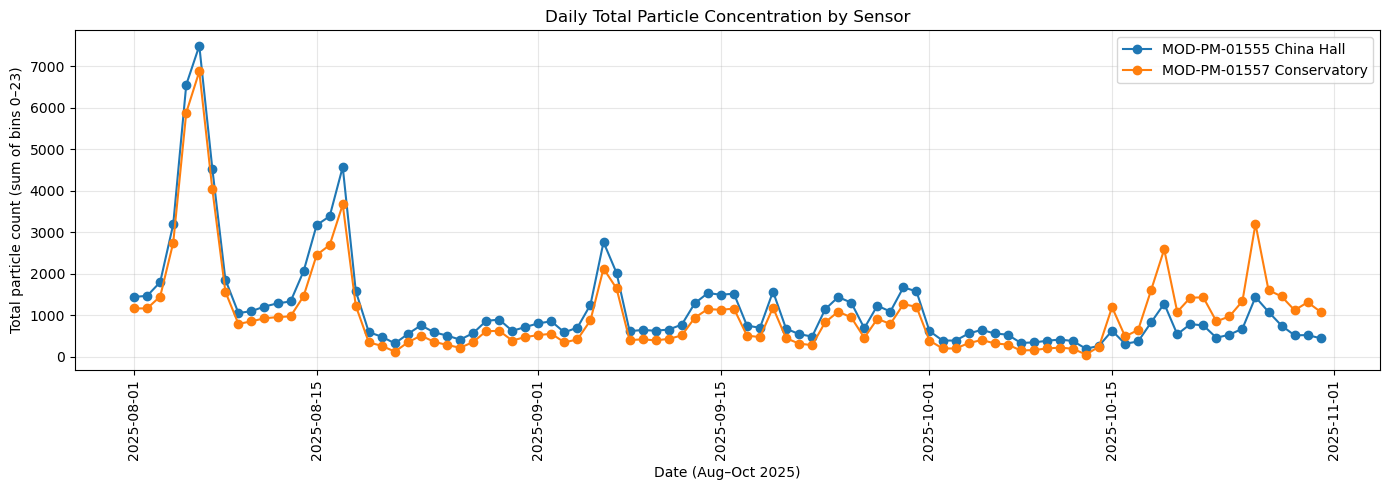

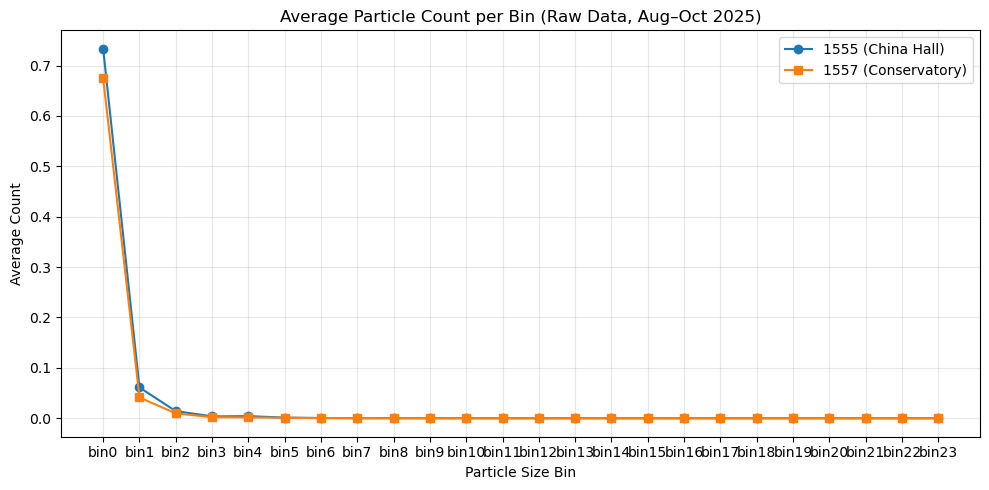

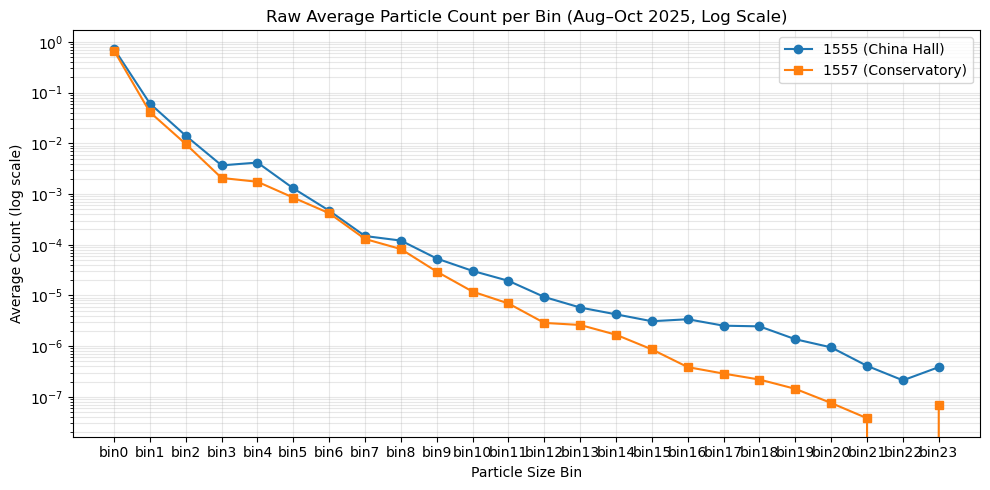

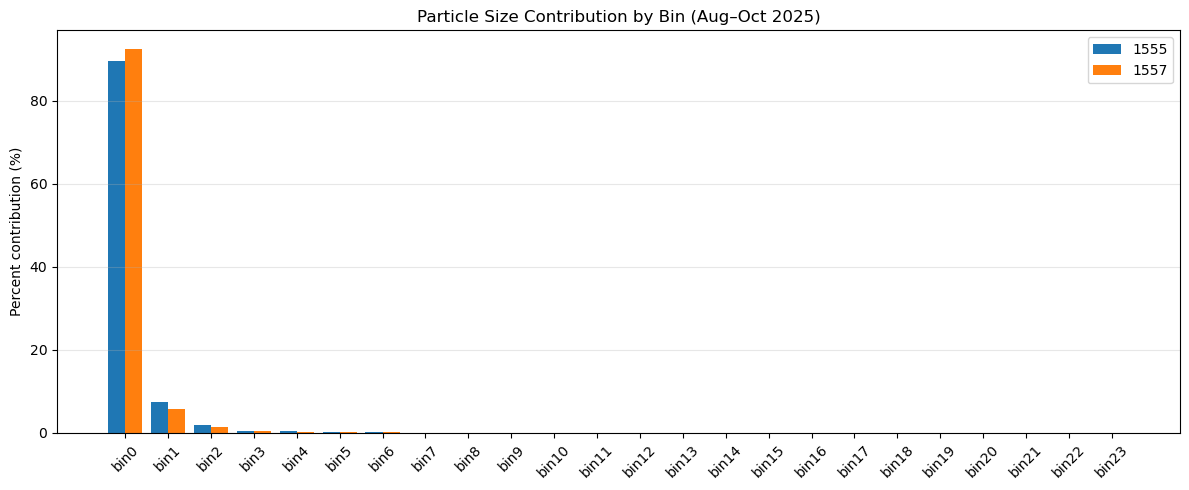

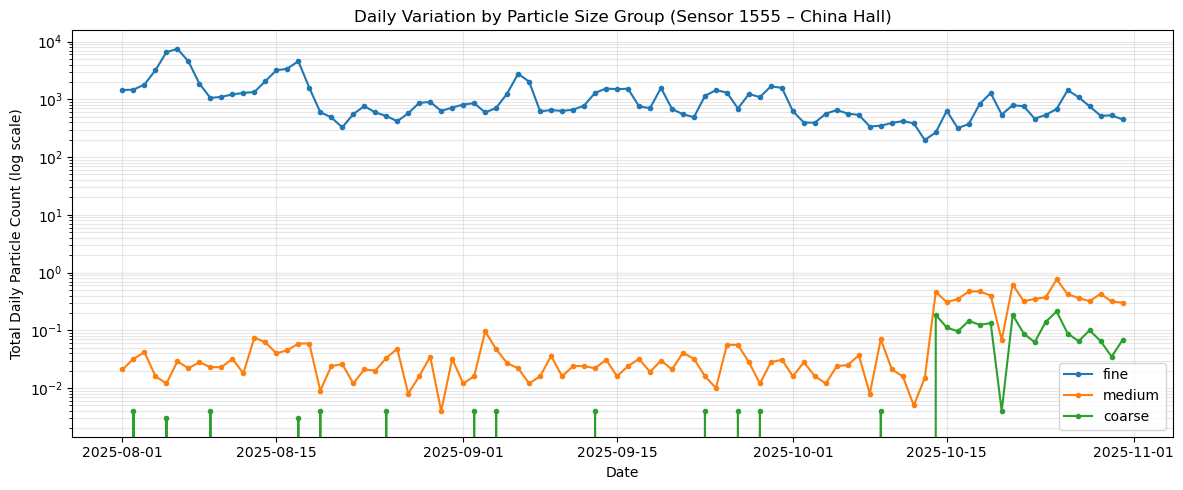

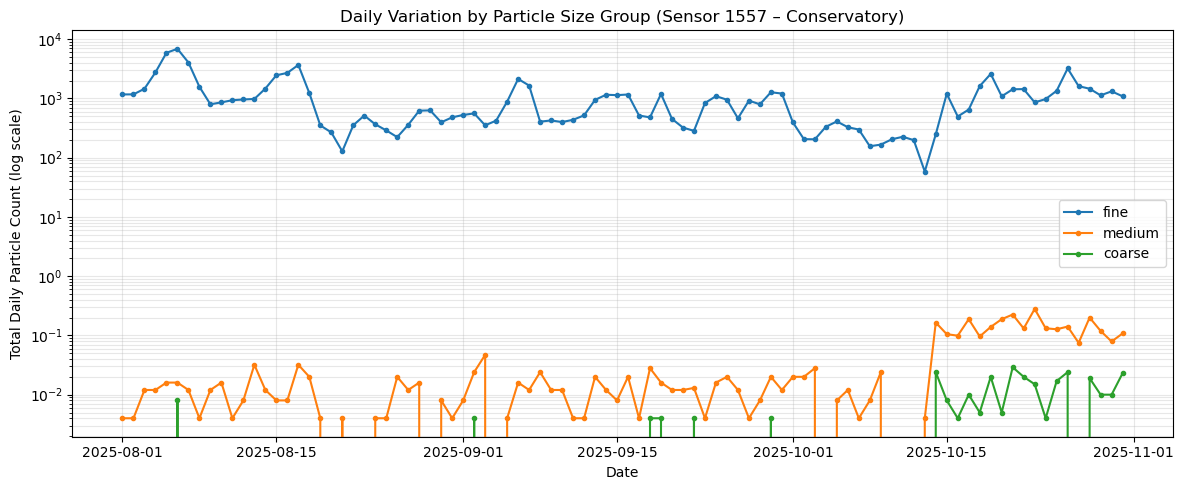

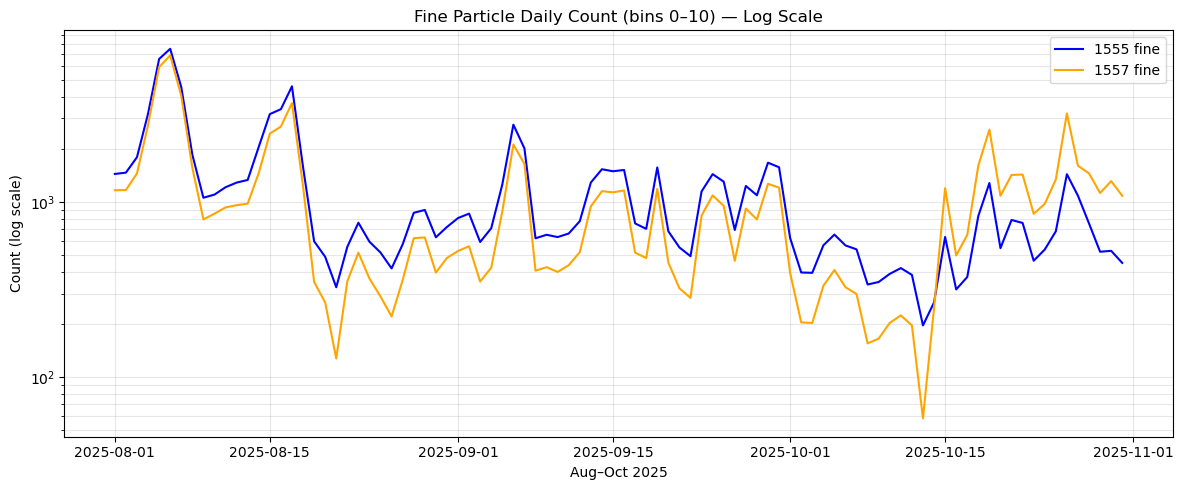

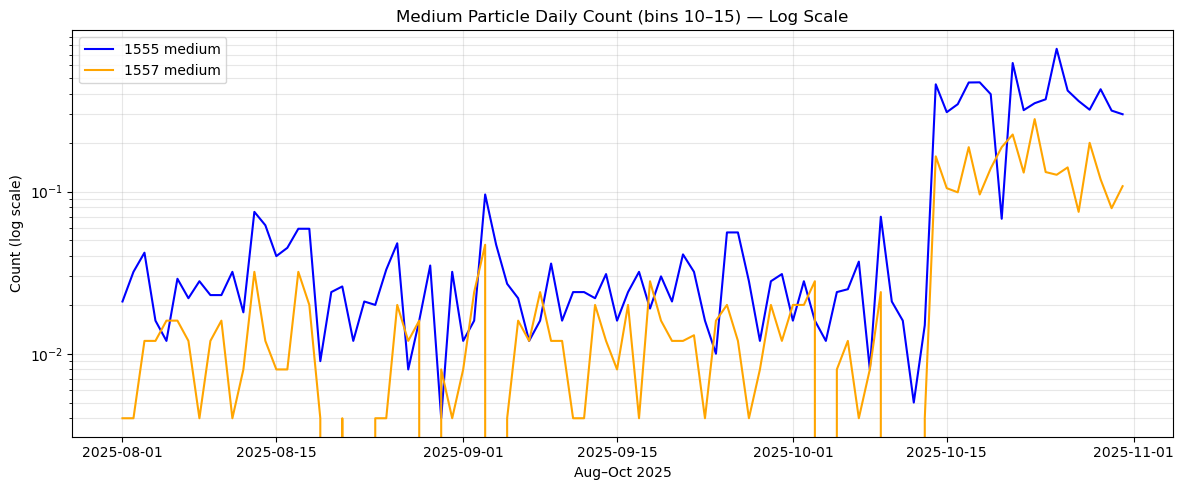

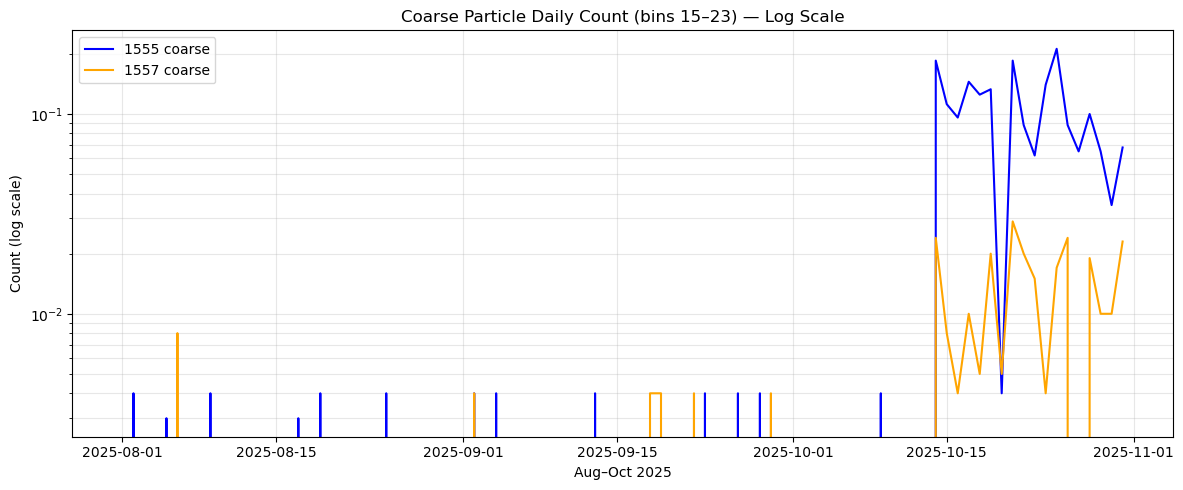

In [43]:

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

plt.style.use("default")


file_1555 =  "MOD-PM-01555-AugtoOct.csv"   
file_1557 =  "MOD-PM-01557-AugtoOct.csv"  


df_1555 = pd.read_csv(file_1555)
df_1557 = pd.read_csv(file_1557)

print("Columns in 1555:", df_1555.columns.tolist())
print("Columns in 1557:", df_1557.columns.tolist())


for df in (df_1555, df_1557):
    df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
    df.sort_values("timestamp", inplace=True)


time_diff = df_1555["timestamp"].diff().dropna()
print("Time-step distribution for 1555:")
print(time_diff.value_counts().head())


bin_cols = [f"bin{i}" for i in range(24)]  # bin0 ... bin23


missing_1555 = [b for b in bin_cols if b not in df_1555.columns]
missing_1557 = [b for b in bin_cols if b not in df_1557.columns]
print("Missing bins in 1555:", missing_1555)
print("Missing bins in 1557:", missing_1557)


df_1555["day"] = df_1555["timestamp"].dt.date
df_1557["day"] = df_1557["timestamp"].dt.date

daily_bins_1555 = df_1555.groupby("day")[bin_cols].sum()
daily_bins_1557 = df_1557.groupby("day")[bin_cols].sum()

daily_total_1555 = daily_bins_1555.sum(axis=1)
daily_total_1557 = daily_bins_1557.sum(axis=1)

df_days = pd.DataFrame({
    "sum_1555": daily_total_1555,
    "sum_1557": daily_total_1557,
}).dropna()

df_days["ratio_sum_1555_1557"] = df_days["sum_1555"] / df_days["sum_1557"]
df_days["pct_diff_sum"] = 100 * (df_days["sum_1555"] - df_days["sum_1557"]) / df_days["sum_1557"]

print(df_days.head())


plt.figure(figsize=(14, 5))
plt.plot(df_days.index, df_days["sum_1555"], marker="o", label="MOD-PM-01555 China Hall")
plt.plot(df_days.index, df_days["sum_1557"], marker="o", label="MOD-PM-01557 Conservatory")
plt.xlabel("Date (Aug–Oct 2025)")
plt.ylabel("Total particle count (sum of bins 0–23)")
plt.title("Daily Total Particle Concentration by Sensor")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

avg_1555 = df_1555[bin_cols].mean()
avg_1557 = df_1557[bin_cols].mean()

plt.figure(figsize=(10, 5))
plt.plot(bin_cols, avg_1555, marker="o", label="1555 (China Hall)")
plt.plot(bin_cols, avg_1557, marker="s", label="1557 (Conservatory)")
plt.xlabel("Particle Size Bin")
plt.ylabel("Average Count")
plt.title("Average Particle Count per Bin (Raw Data, Aug–Oct 2025)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(bin_cols, avg_1555, marker="o", label="1555 (China Hall)")
plt.plot(bin_cols, avg_1557, marker="s", label="1557 (Conservatory)")
plt.xlabel("Particle Size Bin")
plt.ylabel("Average Count (log scale)")
plt.title("Raw Average Particle Count per Bin (Aug–Oct 2025, Log Scale)")
plt.yscale("log")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


sum_per_bin_1555 = df_1555[bin_cols].sum()
sum_per_bin_1557 = df_1557[bin_cols].sum()

total_counts_1555 = sum_per_bin_1555.sum()
total_counts_1557 = sum_per_bin_1557.sum()

pct_1555 = sum_per_bin_1555 / total_counts_1555 * 100
pct_1557 = sum_per_bin_1557 / total_counts_1557 * 100

plt.figure(figsize=(12, 5))
x = range(len(bin_cols))
width = 0.4

plt.bar([i - width/2 for i in x], pct_1555.values, width=width, label="1555")
plt.bar([i + width/2 for i in x], pct_1557.values, width=width, label="1557")
plt.xticks(x, bin_cols, rotation=45)
plt.ylabel("Percent contribution (%)")
plt.title("Particle Size Contribution by Bin (Aug–Oct 2025)")
plt.legend()
plt.grid(True, axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


fine_bins   = [f"bin{i}" for i in range(0, 10)]   # smallest
medium_bins = [f"bin{i}" for i in range(10, 15)]  # mid
coarse_bins = [f"bin{i}" for i in range(15, 23+1)]  # largest

groups_1555 = pd.DataFrame({
    "fine":   daily_bins_1555[fine_bins].sum(axis=1),
    "medium": daily_bins_1555[medium_bins].sum(axis=1),
    "coarse": daily_bins_1555[coarse_bins].sum(axis=1),
})

groups_1557 = pd.DataFrame({
    "fine":   daily_bins_1557[fine_bins].sum(axis=1),
    "medium": daily_bins_1557[medium_bins].sum(axis=1),
    "coarse": daily_bins_1557[coarse_bins].sum(axis=1),
})


plt.figure(figsize=(12, 5))
plt.plot(groups_1555.index, groups_1555["fine"],   label="fine",   marker=".")
plt.plot(groups_1555.index, groups_1555["medium"], label="medium", marker=".")
plt.plot(groups_1555.index, groups_1555["coarse"], label="coarse", marker=".")
plt.yscale("log")
plt.xlabel("Date")
plt.ylabel("Total Daily Particle Count (log scale)")
plt.title("Daily Variation by Particle Size Group (Sensor 1555 – China Hall)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(groups_1557.index, groups_1557["fine"],   label="fine",   marker=".")
plt.plot(groups_1557.index, groups_1557["medium"], label="medium", marker=".")
plt.plot(groups_1557.index, groups_1557["coarse"], label="coarse", marker=".")
plt.yscale("log")
plt.xlabel("Date")
plt.ylabel("Total Daily Particle Count (log scale)")
plt.title("Daily Variation by Particle Size Group (Sensor 1557 – Conservatory)")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(groups_1555.index, groups_1555["fine"],   label="1555 fine",  color="blue")
plt.plot(groups_1557.index, groups_1557["fine"],   label="1557 fine",  color="orange")
plt.yscale("log")
plt.xlabel("Aug–Oct 2025")
plt.ylabel("Count (log scale)")
plt.title("Fine Particle Daily Count (bins 0–10) — Log Scale")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(groups_1555.index, groups_1555["medium"], label="1555 medium", color="blue")
plt.plot(groups_1557.index, groups_1557["medium"], label="1557 medium", color="orange")
plt.yscale("log")
plt.xlabel("Aug–Oct 2025")
plt.ylabel("Count (log scale)")
plt.title("Medium Particle Daily Count (bins 10–15) — Log Scale")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(groups_1555.index, groups_1555["coarse"], label="1555 coarse", color="blue")
plt.plot(groups_1557.index, groups_1557["coarse"], label="1557 coarse", color="orange")
plt.yscale("log")
plt.xlabel("Aug–Oct 2025")
plt.ylabel("Count (log scale)")
plt.title("Coarse Particle Daily Count (bins 15–23) — Log Scale")
plt.grid(True, which="both", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
print(f"Rows: {df_1557.shape[0]}, Columns: {df_1557.shape[1]}")

Rows: 132329, Columns: 56


In [20]:
print(f"Rows: {df_1555.shape[0]}, Columns: {df_1557.shape[1]}")

Rows: 132371, Columns: 56


In [11]:

df_1555['timestamp'] = pd.to_datetime(df_1555['timestamp'], errors='coerce')
df_1557['timestamp'] = pd.to_datetime(df_1557['timestamp'], errors='coerce')

start = "2025-08-01"
end   = "2025-10-15"       

df5 = df_1555[(df_1555['timestamp'] >= start) & (df_1555['timestamp'] <= end)].copy()
df7 = df_1557[(df_1557['timestamp'] >= start) & (df_1557['timestamp'] <= end)].copy()


In [4]:
bin_cols = [f"bin{i}" for i in range(24)]

ctrl = df5[['timestamp'] + bin_cols].merge(
    df7[['timestamp'] + bin_cols],
    on='timestamp',
    suffixes=('_1555', '_1557')
)


In [16]:
diff_df = pd.DataFrame({
    b: ctrl[f"{b}_1555"] - ctrl[f"{b}_1557"] 
    for b in bin_cols
})


In [17]:
mean_diff = diff_df.mean()
sd_diff   = diff_df.std(ddof=1)

summary = pd.DataFrame({
    "bin": bin_cols,
    "mean_diff": mean_diff.values,
    "sd_diff": sd_diff.values
})

summary["mean ± sd"] = summary["mean_diff"].round(6).astype(str) + " ± " + summary["sd_diff"].round(6).astype(str)
summary


,bin,mean_diff,sd_diff,mean ± sd
0,bin0,3.441675e-01,0.306156,0.344167 ± 0.306156
1,bin1,8.445495e-02,0.083768,0.084455 ± 0.083768
2,bin2,2.069721e-02,0.023004,0.020697 ± 0.023004
3,bin3,5.248624e-03,0.007130,0.005249 ± 0.00713
4,bin4,5.265475e-03,0.006885,0.005265 ± 0.006885
5,bin5,1.072558e-03,0.002980,0.001073 ± 0.00298
6,bin6,2.876547e-04,0.001820,0.000288 ± 0.00182
7,bin7,7.221458e-05,0.001043,7.2e-05 ± 0.001043
8,bin8,5.759972e-05,0.000869,5.8e-05 ± 0.000869
9,bin9,9.456671e-06,0.000434,9e-06 ± 0.000434


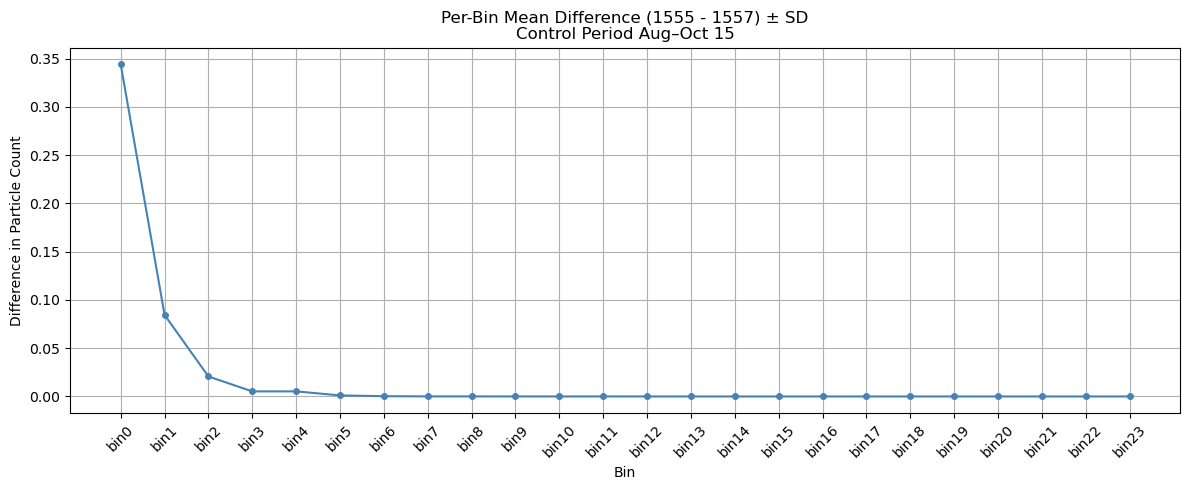

In [25]:

plt.figure(figsize=(12,5))
plt.errorbar(summary["bin"], summary["mean_diff"],
             fmt='o-', markersize=4, color='steelblue')
plt.xticks(rotation=45)
plt.title("Per-Bin Mean Difference (1555 - 1557) ± SD\nControl Period Aug–Oct 15")
plt.xlabel("Bin")
plt.ylabel("Difference in Particle Count")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
accum_bins   = [f"bin{i}" for i in range(0, 4)]   # 0–3
coarse_bins  = [f"bin{i}" for i in range(4, 16)]  # 4–15
#pm25_bins    = [f"bin{i}" for i in range(0, 7)]   # 0–6
#pm10_bins    = [f"bin{i}" for i in range(0, 12)]  # 0–11
enorm_bins   = [f"bin{i}" for i in range(15, 23)] # 15–23


In [26]:
groups_1555 = {
    "accumulation": df5[accum_bins].sum().sum(),
    "coarse":       df5[coarse_bins].sum().sum(),
    #"PM2.5":        df5[pm25_bins].sum().sum(),
    #"PM10":         df5[pm10_bins].sum().sum(),
    "enormous":     df5[enorm_bins].sum().sum()
}

groups_1557 = {
    "accumulation": df7[accum_bins].sum().sum(),
    "coarse":       df7[coarse_bins].sum().sum(),
    #"PM2.5":        df7[pm25_bins].sum().sum(),
    #"PM10":         df7[pm10_bins].sum().sum(),
    "enormous":     df7[enorm_bins].sum().sum()
}

group_compare = pd.DataFrame({"1555": groups_1555, "1557": groups_1557})
group_compare


,1555,1557
accumulation,95770.998,73098.114
coarse,570.574,141.275
enormous,0.235,0.048


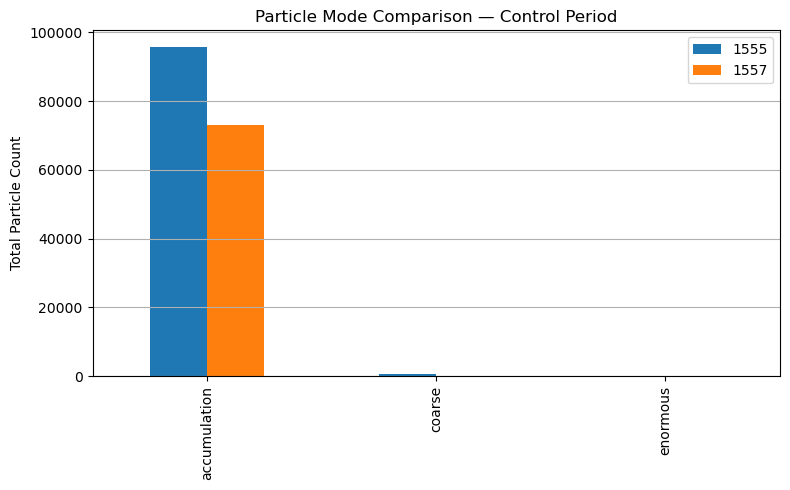

In [27]:
group_compare.plot(kind='bar', figsize=(8,5))
plt.title("Particle Mode Comparison — Control Period")
plt.ylabel("Total Particle Count")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [30]:
pm25_bins    = [f"bin{i}" for i in range(0, 7)]   # 0–6
pm10_bins    = [f"bin{i}" for i in range(0, 12)]  # 0–11
groups_1555 = {
      "PM2.5":        df5[pm25_bins].sum().sum(),
      "PM10":         df5[pm10_bins].sum().sum(),
}
groups_1557 = {
      "PM2.5":        df7[pm25_bins].sum().sum(),
      "PM10":         df7[pm10_bins].sum().sum(),
}
group_compare1 = pd.DataFrame({"1555": groups_1555, "1557": groups_1557})
group_compare1



,1555,1557
PM2.5,96320.231,73227.777
PM10,96341.031,73239.109


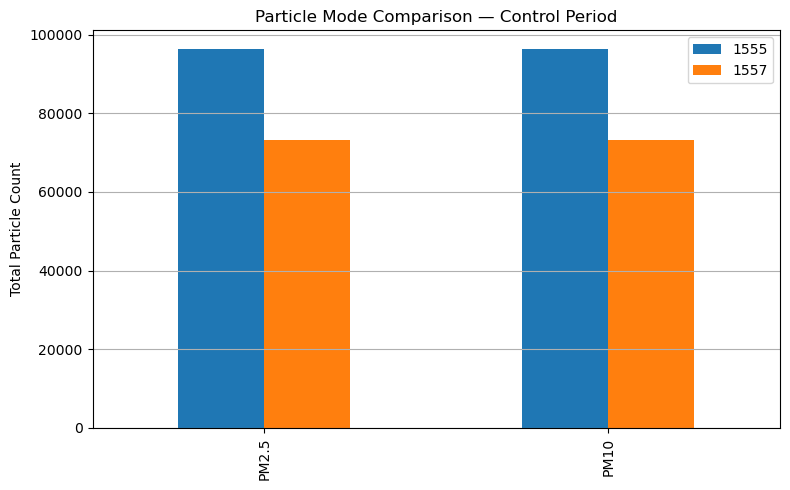

In [31]:
group_compare1.plot(kind='bar', figsize=(8,5))
plt.title("Particle Mode Comparison — Control Period")
plt.ylabel("Total Particle Count")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
